In [1]:
#import kaggle as kg     #Import to access Kaggle Public API
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

In [2]:
# Download latest version of the  data in CSV via Kaggle
#kg.api.authenticate()
#kg.api.dataset_download_files('anonymous28574/gaming-trends-2024', path='.', unzip=True)

In [3]:
#___Exploration___
#Read in the raw data to notebook
rawdat=pd.read_csv("Gaming-Trends-2024.csv")
print(rawdat.dtypes)     #Verify Datatypes

rawdat.head()

Date                           object
Platform                       object
Daily Active Users (DAU)        int64
New Registrations               int64
Session Duration (minutes)    float64
In-game Purchases ($)         float64
Social Media Mentions           int64
Stream Viewership             float64
Revenue ($)                   float64
Top Genre                      object
Influencer Endorsements         int64
dtype: object


,Date,Platform,Daily Active Users (DAU),New Registrations,Session Duration (minutes),In-game Purchases ($),Social Media Mentions,Stream Viewership,Revenue ($),Top Genre,Influencer Endorsements
0,2022-04-13,PC,142204,14220,31.266635,60772.724060,7116,85079.542766,87378.407590,Action,0
1,2021-03-17,PC,132314,13231,23.314436,43499.834450,6582,64188.420576,41132.113751,Action,0
2,2019-03-09,VR,111557,11155,33.859334,52178.791314,5572,34385.665788,71787.342041,Simulation,0
3,2021-03-31,Console,132909,13290,80.580010,25085.562444,6619,43129.915707,18639.641156,RPG,0
4,2021-02-04,Mobile,130694,13069,37.270903,55277.074439,6555,69341.389827,63849.959750,Action,0


In [4]:
#___Clean Datatypes and formatting___
rawdat["Date"]=pd.to_datetime(rawdat["Date"],yearfirst=True)        #Convert Date into actual DateTime data

#Round Session Duration to 2 decimals
rawdat["Session Duration (minutes)"]=round(rawdat["Session Duration (minutes)"],ndigits=2)

#Round In-Game Purchases down to 2 decimals
rawdat["In-game Purchases ($)"]=round(rawdat["In-game Purchases ($)"],ndigits=2)

#Stream viewer should be a whole number to avoid "percentages of a person," therefore convert to integer
rawdat["Stream Viewership"]=rawdat["Stream Viewership"].astype("int32")

#Round Revenue down to 2 decimals
rawdat["Revenue ($)"]=round(rawdat["Revenue ($)"],ndigits=2)

rawdat.head()

,Date,Platform,Daily Active Users (DAU),New Registrations,Session Duration (minutes),In-game Purchases ($),Social Media Mentions,Stream Viewership,Revenue ($),Top Genre,Influencer Endorsements
0,2022-04-13,PC,142204,14220,31.27,60772.72,7116,85079,87378.41,Action,0
1,2021-03-17,PC,132314,13231,23.31,43499.83,6582,64188,41132.11,Action,0
2,2019-03-09,VR,111557,11155,33.86,52178.79,5572,34385,71787.34,Simulation,0
3,2021-03-31,Console,132909,13290,80.58,25085.56,6619,43129,18639.64,RPG,0
4,2021-02-04,Mobile,130694,13069,37.27,55277.07,6555,69341,63849.96,Action,0


## Research Question 1:
* What are most Profitable Platforms and Genres?
## Proposed Analysis Figures:
* Barchart of Revenue by Platform
* Barchart of Revenue by Genre

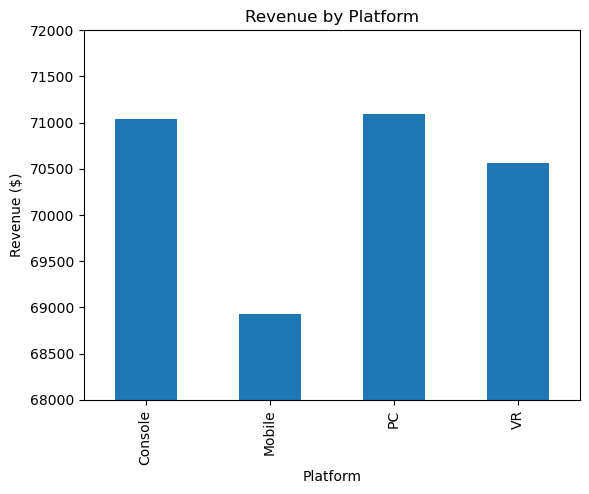

In [5]:
#___Generating Figure 1.1___
#Isolate the data subset to be used for Revenue by Platform analysis
profcat1=round(rawdat[["Platform","Revenue ($)"]].groupby("Platform").mean(),ndigits=2)

#Plot the bar chart
profcat1.plot(kind="bar",ylim=(68000,72000),legend=False,ylabel="Revenue ($)",title="Revenue by Platform");

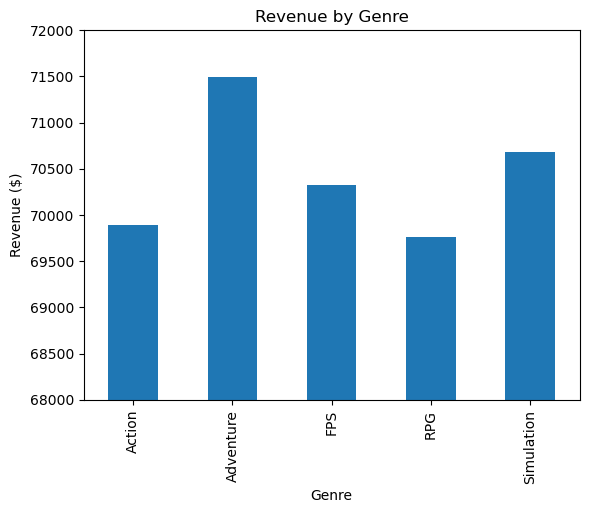

In [6]:
#___Generating Figure 1.2___
#Isolate Subset to be used in Revenue by Genre Analysis
profcat2=round(rawdat[["Top Genre","Revenue ($)"]].groupby("Top Genre").mean(),ndigits=2)

#Plot the bar chart
profcat2.plot(kind="bar",ylim=(68000,72000),legend=False,ylabel="Revenue ($)",xlabel="Genre",
              title="Revenue by Genre");

## Question 1 Analysis (Continued):
Figures 1.1 and 1.2 appear to lack a certain amount of detail, so we went on to combine the bar charts into a stacked bar chart for a more in depth view of categorical revenue return.

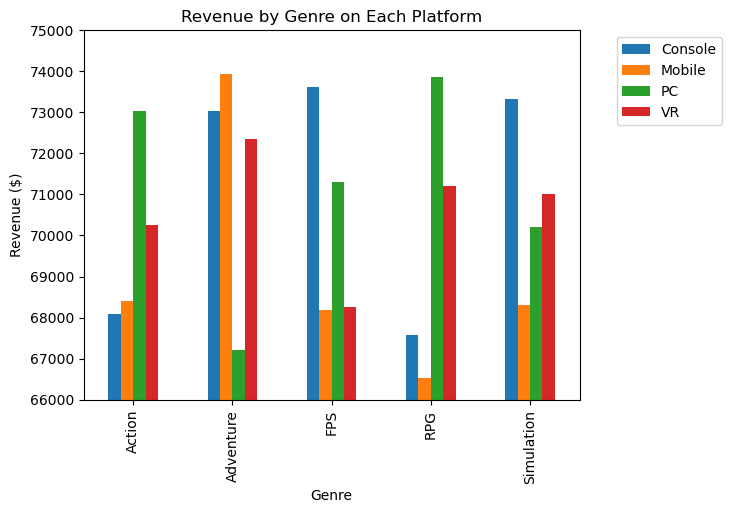

In [7]:
#___Generating Figure 1.3___
#Generate empty Dataframe to fill with the categorized data to be presented
profcat3=pd.DataFrame()
for p in range(0,4):        #Use For loop to create column data for each platform
    profcat3[profcat1.index[p]]=round(rawdat[rawdat["Platform"]==profcat1.index[p]][["Top Genre","Revenue ($)"]]\
                                      .groupby("Top Genre").mean(),ndigits=2)

#Plot stacked barchart
profcat3.plot(kind="bar",ylim=(66000,75000),ylabel="Revenue ($)",xlabel="Genre",
              title="Revenue by Genre on Each Platform");

plt.legend(loc="upper right",bbox_to_anchor=[1.3,1]);        #Position Legend outside plot area

## Research Question 2:
* What is the best time of year to release games?
## Proposed Analysis Figures:
* Time series plot of Revenue
* Time Series Plot of Stream Viewership as a metric of "staying power" or "continued relevancy"

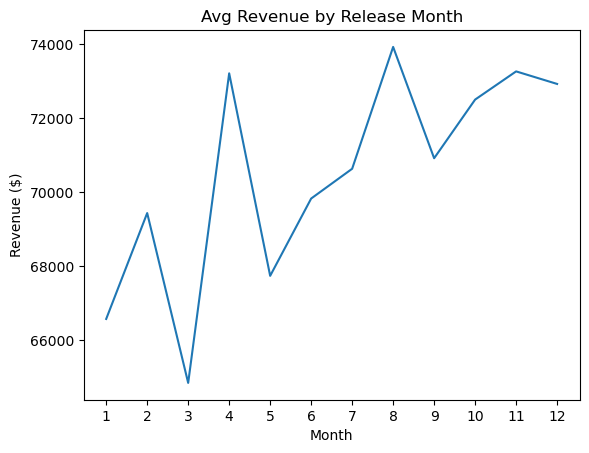

In [8]:
#___Generating Figure 2.1___
#Isolate subset of data to be used in Avg Revenue by Release Month analysis
timer=rawdat[["Date","Revenue ($)"]].sort_values("Date")        #Sort Release dates
timer["Month"]=timer["Date"].dt.month       #Create column for release month
timer=timer[["Month","Revenue ($)"]].groupby("Month").mean()        #Grouby data by month, averaging total revenue

#Plot line plot of average revenue of a game by its release month
timer.plot(legend=False,xticks=range(1,13),ylabel="Revenue ($)",title="Avg Revenue by Release Month");

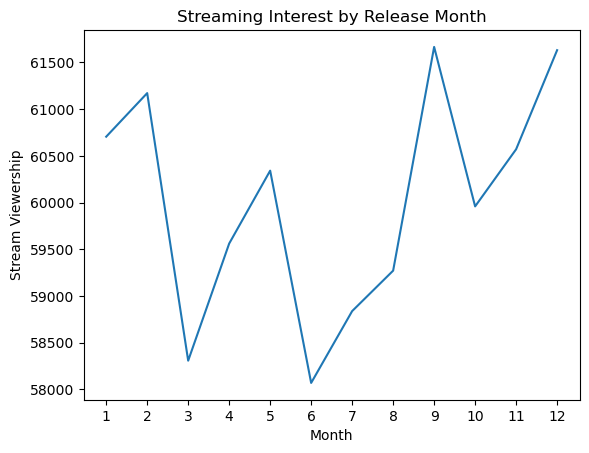

In [9]:
#___Generating Figure 2.2___
#Isolate data subset to be used in (Streaming) Relevancy by release month
times=rawdat[["Date","Stream Viewership"]].sort_values("Date")      #Sort by date
times["Month"]=times["Date"].dt.month       #Create release month column
times=times[["Month","Stream Viewership"]].groupby("Month").mean()      #Group Avg Stream Viewership by release

#Plot line graph of streaming interest by initial release month
times.plot(legend=False,ylabel="Stream Viewership",xticks=range(1,13),
           title="Streaming Interest by Release Month");

## Research Question 3:
* How much impact does social media presence have on a game?
## Proposed Analysis Figures:
* Scatter + Trend of Revenue by Social Media Mentions
* Binned Bar Chart of Revenue by Social Media Mentions
* Scatter + Trend of New Registrations by Social Media Mentions

Trend Line Equation: y = -0.68x + 74278.92


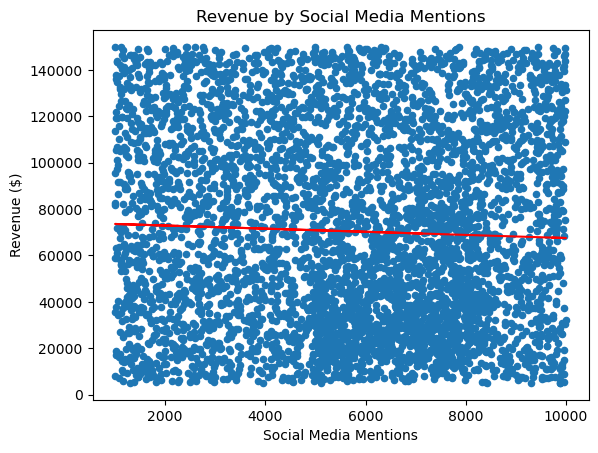

In [10]:
#___Initial Data Exploration of Question 3___
# >Attempting to generate proposed scatter plot with our data<

#Isolate subset of data to be used for Revenue by Social Media Presence Analysis
smscat1=rawdat[["Revenue ($)","Social Media Mentions"]]

#Plot scatter chart of Revenue by social media mentions
smscat1.plot(kind="scatter",x="Social Media Mentions",y="Revenue ($)",title="Revenue by Social Media Mentions");

#Create trend line
x_values = smscat1["Social Media Mentions"]
y_values = smscat1["Revenue ($)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "Trend Line Equation: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Trend Line
print(line_eq)
plt.plot(x_values,regress_values,"r-");

## Question 3 Analysis (Continued):
Suffice it to say, this scatter plot looks rather unappealing, and the trend line only indicates a minimal downward trend. To consolidate this analysis into a more digestible form, we proceeded to combine this analysis with the proposed second analysis figure, by binning the Social Media Mentions into ranges to be plotted against averaged Revenue in a line chart.

C:\Users\corie\AppData\Local\Temp\ipykernel_22876\2413068512.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smscat1["Range"]=pd.cut(smscat1["Social Media Mentions"],       #Create Range Column via pd.cut
C:\Users\corie\AppData\Local\Temp\ipykernel_22876\2413068512.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Range").mean(),ndigits=2)


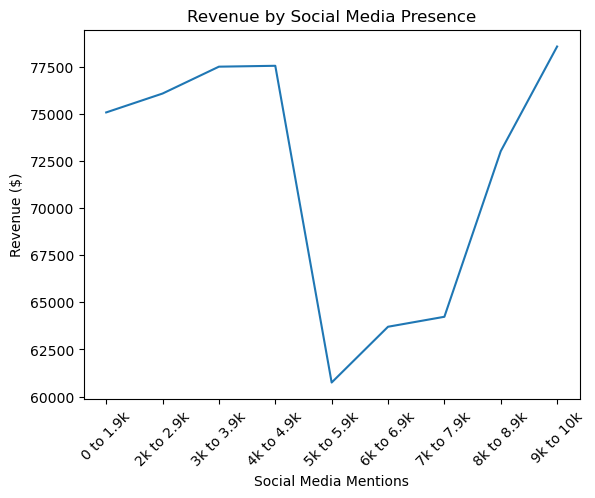

In [11]:
#___Generating Figure 3.1___

#Creating Social Media Mentions bins and labels
smmbin=[0,2000,3000,4000,5000,6000,7000,8000,9000,10000]
smmlabel=["0 to 1.9k","2k to 2.9k","3k to 3.9k","4k to 4.9k","5k to 5.9k","6k to 6.9k","7k to 7.9k",
          "8k to 8.9k","9k to 10k"]

smscat1["Range"]=pd.cut(smscat1["Social Media Mentions"],       #Create Range Column via pd.cut
                        bins=smmbin,labels=smmlabel,right=False,include_lowest=True)

smscat1=round(smscat1[["Revenue ($)","Range"]]      #Groupby the Range and format the averages to 2-place decimals
              .groupby("Range").mean(),ndigits=2)

#Plot the Line chart of Average Revenue by (binned) Social Media Presence
smscat1.plot(rot=45,legend=False,ylabel="Revenue ($)",xlabel="Social Media Mentions",
             title="Revenue by Social Media Presence");

Trend Line Equation: y = 0.17x + 10132.52


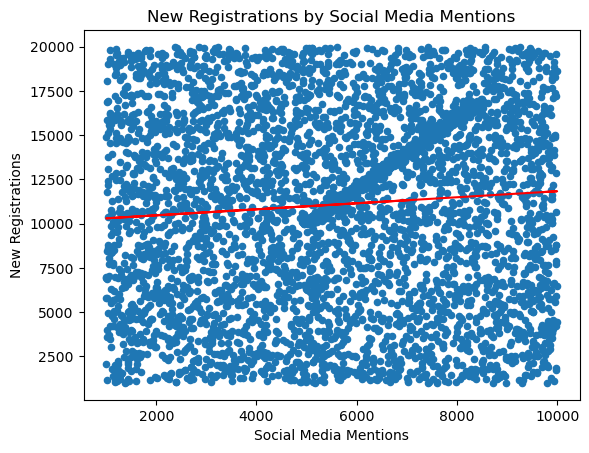

In [12]:
#___Initial Data Exploration of Question 3 (Part 2)___
# >Attempting to generate the second proposed scatter plot with our data<

#Isolate subset of data to be used for New Player Influx by Social Media Presence Analysis
smscat2=rawdat[["New Registrations","Social Media Mentions"]]

#Plot the scatter plot
smscat2.plot(kind="scatter",x="Social Media Mentions",y="New Registrations",
             title="New Registrations by Social Media Mentions");

x_values2 = smscat2["Social Media Mentions"]
y_values2 = smscat2["New Registrations"]
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_values2, y_values2)
regress_values2 = x_values2 * slope2 + intercept2
line_eq2 = "Trend Line Equation: y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

#Plot Trend Line
print(line_eq2)
plt.plot(x_values2,regress_values2,"r-");

## Question 3 Analysis (Continued):
Once again, we are faced with a rather uninsightful scatterplot. Worse still, the data between 5k-9k mentions seem to cluster into a visible line that is not corroboarted by the minimal trendline fro the entire scope of data. We, therefore, mirrored our approach in generating Figure 3.1 to generate Figure 3.2: by binning the Social Media Mentions and Averaging the New Registrations for each range.

C:\Users\corie\AppData\Local\Temp\ipykernel_22876\2208848210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smscat2["Range"]=pd.cut(smscat2["Social Media Mentions"],       #Create Range Column via pd.cut
C:\Users\corie\AppData\Local\Temp\ipykernel_22876\2208848210.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  "Range"]].groupby("Range").mean(),ndigits=2)


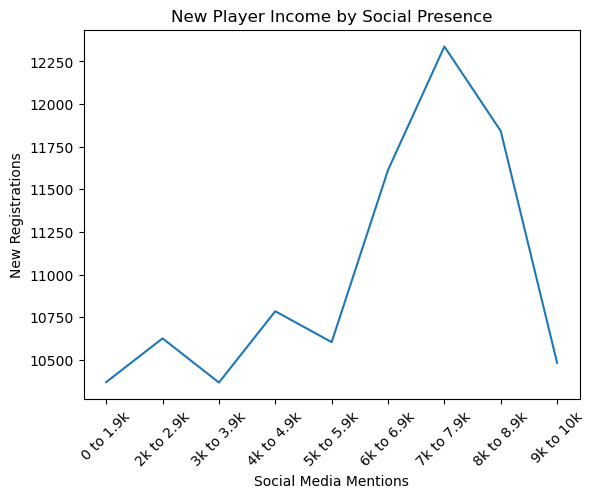

In [13]:
#___Generating Figure 3.1___
smscat2["Range"]=pd.cut(smscat2["Social Media Mentions"],       #Create Range Column via pd.cut
                        bins=smmbin,labels=smmlabel,right=False,include_lowest=True)

smscat2=round(smscat2[["New Registrations",        #Groupby the Range and format the averages to 2-place decimals
              "Range"]].groupby("Range").mean(),ndigits=2)

#Plot the Line chart of Average New Player Influx by (binned) Social Media Presence
smscat2.plot(rot=45,legend=False,ylabel="New Registrations",xlabel="Social Media Mentions",
             title="New Player Income by Social Presence");

## Research Question :
* What is the effect of the Streaming Industry on the success of a game?
## Proposed Analysis Figures:
* Binary Paired Scatterplots (New Registrations Vs Stream Viewership, Scaled by Revenue)
* Line chart or Scatter+ Trend (Stream Viewership Vs Revenue)
### Note:
After the issues with scatterplotting the data in our exploration of Question 3, we were not particularly optimistic in our proposed scatterplots for Question 4. Therefore, we performed a minimal test of scatterplotting the New Registration Data by Stream Viewership for Endorsed games only (without Revenue scaling) at first, to verify the value of such a plot for this data beforehand

In [14]:
#___Initial Data Exploration for Question 4___
#Despite being listed as a binary dataset, we quickly found the Influencer Endorsement field to sport values
#outside of 0's and 1's.
rawdat["Influencer Endorsements"].value_counts()

Influencer Endorsements
0    2910
1    1997
2      36
3      23
4      14
5       6
6       2
7       1
Name: count, dtype: int64

## Question 4 Analysis (continued):
Despite the Influencer Endorsement data being not strictly binary in its values, we still treated it as such (per the original data information intent), by grouping the data as Endorsements==0 and Endorsements>=1

Trend Line Equation: y = -0.0x + 10785.97


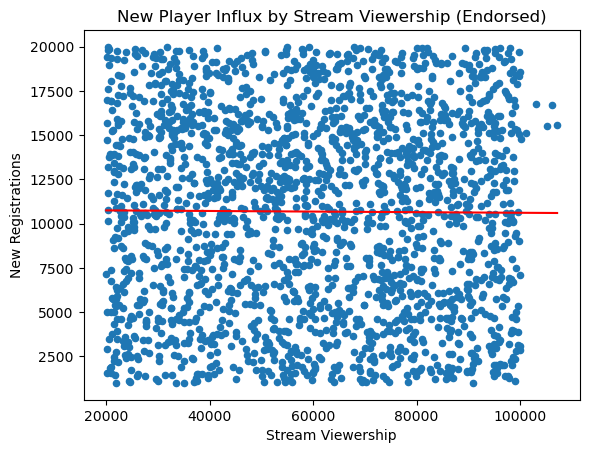

In [15]:
#___Initial Data Exploration for Question 4 (continued)___
# >Attempting to generate the proposed scatter plot with our data<

#Isolate the subset of data to be used for New Player Influx by Stream Viewership
overe=rawdat[rawdat["Influencer Endorsements"]>=1][["New Registrations","Stream Viewership"]]\
    .sort_values("Stream Viewership")

#Plot the scatterplot
overe.plot(kind="scatter",x="Stream Viewership",y="New Registrations",
           title="New Player Influx by Stream Viewership (Endorsed)");

#Create Trend Line
x_values3 = overe["Stream Viewership"]
y_values3 = overe["New Registrations"]
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x_values3, y_values3)
regress_values3 = x_values3 * slope3 + intercept3
line_eq3 = "Trend Line Equation: y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))

#Plot Trend Line
print(line_eq3)
plt.plot(x_values3,regress_values3,"r-");

## Question 4 Analysis (continued):
As expected, the scatterplot for the proposed analysis did not yield meaningful results. We readapted our analysis approach by seeking to generate figures for the following:
* Twin Line plots of Avg Revenue by (binned) Stream Popularity for both Endorsed and Not Endorsed games
* Line Plot of Daily Active Users by (binned) Stream Popularity

C:\Users\corie\AppData\Local\Temp\ipykernel_22876\3327045527.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overa=round(overa[["Range","Revenue ($)"]].groupby("Range").mean(),ndigits=2)
C:\Users\corie\AppData\Local\Temp\ipykernel_22876\3327045527.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overa["Not Endorsed"]=round(overb[["Range","Revenue ($)"]].groupby("Range").mean(),ndigits=2)


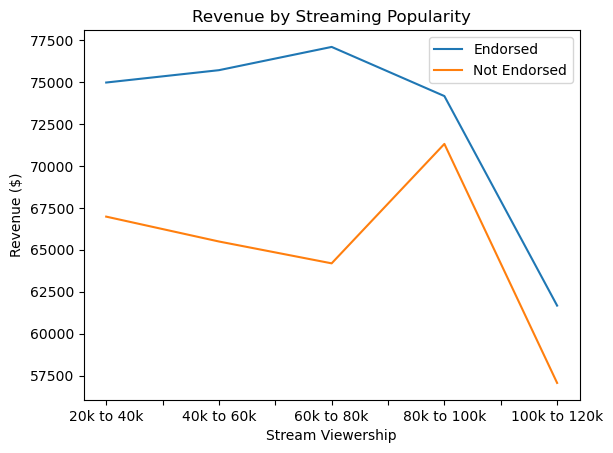

In [16]:
#___Generating Figure 4.1___
#Isolate the data subsets for the analysis of Revenue by Stream viewership of both Endorsed and Non Endorsed Games
overa=rawdat[rawdat["Influencer Endorsements"]>=1][["Stream Viewership","Revenue ($)"]]\
    .sort_values("Stream Viewership")

overb=rawdat[rawdat["Influencer Endorsements"]==0][["Stream Viewership","Revenue ($)"]]\
    .sort_values("Stream Viewership")

#Bin and Label Stream Viewership Ranges
strbin=[0,20000,40000,60000,80000,100000,120000]
strlab=["0 to 20k","20k to 40k","40k to 60k","60k to 80k","80k to 100k","100k to 120k"]

#Create the Range column for each dataframe via pd.cut
overa["Range"]=pd.cut(overa["Stream Viewership"],bins=strbin,labels=strlab,include_lowest=True)
overb["Range"]=pd.cut(overb["Stream Viewership"],bins=strbin,labels=strlab,include_lowest=True)

#Combine into single dataframe with Endorsed Avg Revenue and Non Endorsed Avg Revenue Columns
overa=round(overa[["Range","Revenue ($)"]].groupby("Range").mean(),ndigits=2)
overa.rename(columns={"Revenue ($)":"Endorsed"},inplace=True)
overa["Not Endorsed"]=round(overb[["Range","Revenue ($)"]].groupby("Range").mean(),ndigits=2)

#Plot the dual line charts
overa.plot(ylabel="Revenue ($)",xlabel="Stream Viewership",title="Revenue by Streaming Popularity");

C:\Users\corie\AppData\Local\Temp\ipykernel_22876\3348362048.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daustr["Range"]=pd.cut(daustr["Stream Viewership"],bins=strbin,labels=strlab,include_lowest=True)
C:\Users\corie\AppData\Local\Temp\ipykernel_22876\3348362048.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daustr=daustr[["Daily Active Users (DAU)","Range"]].groupby("Range").mean()


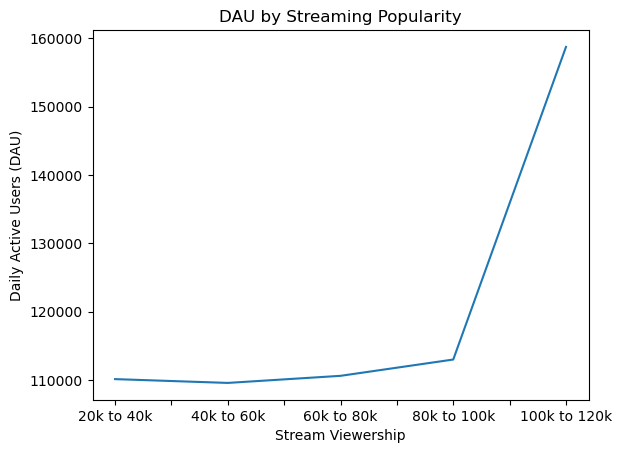

In [17]:
#___Generating Figure 4.2___
#Isolate the data subset to be used in the DAU by (binned) Stream Popularity analysis
daustr=rawdat[["Daily Active Users (DAU)","Stream Viewership"]]

#Create the Range column from previously made bins
daustr["Range"]=pd.cut(daustr["Stream Viewership"],bins=strbin,labels=strlab,include_lowest=True)
daustr=daustr[["Daily Active Users (DAU)","Range"]].groupby("Range").mean()

#Plot the line chart
daustr.plot(legend=False,ylabel="Daily Active Users (DAU)",xlabel="Stream Viewership",
            title="DAU by Streaming Popularity");